# Black friday Dataset EDA and feature Engineering
## Cleaning and preparing the data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

## Problem Statement

1.A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

2.Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# import the dataset
df_train = pd.read_csv("BlackFriday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
## import the test  dataset 
df_test = pd.read_csv("BlackFriday_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# combine both test and train data
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
# read data columns
df_columns = df.columns
df_columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
# read the total columns and rows
data_size = df.shape
data_size

(783667, 12)

In [7]:
## read the data types of each columns
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [8]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [9]:
#data describe
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
df.drop('User_ID', axis =1 ,inplace = True)

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Data Preprocessing

In [12]:
# find out the categorical columns
categorical_column = []
for col in df.columns:
    if df[col].dtypes == "O":
        categorical_column.append(col)
categorical_column 

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [13]:
## Handing the Cateorical feature column Gender
from sklearn.preprocessing import LabelEncoder

label_object = LabelEncoder()
df['Gender'] = label_object.fit_transform(df['Gender'])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# df['Gender'] = df['Gender'].map({F : 0, M : 1})
# df.head()

In [15]:
# Handing the categorical column Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
pd.get_dummies(df['Age'], drop_first = True).astype(int)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
783662,0,1,0,0,0,0
783663,0,1,0,0,0,0
783664,0,1,0,0,0,0
783665,0,0,0,1,0,0


In [17]:
df['Age'] = df['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55': 5, '55+':6})

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
# from sklearn.preprocessing import LabelEncoder

# Label_object = LabelEncoder()
# df['Age'] = label_object.fit_transform(df['Age'])
# df.head()

In [20]:
# fixing the categorical feartures City_Category

df_city = pd.get_dummies(df['City_Category'], drop_first=True).astype(int)

df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [21]:
df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
df['City_Category'] = df['City_Category'].map({'A':1, 'B':2, 'C':3})

In [23]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,3,4+,0,8,NaN,NaN,7969.0


In [24]:
# find the out null data in given dataset
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [25]:
# find out which columns have miss data
[features for features in df.columns  if df[features].isnull().sum()>0]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [26]:
df['Age'].head(20)

0     0
1     0
2     0
3     0
4     6
5     2
6     4
7     4
8     4
9     2
10    2
11    2
12    2
13    2
14    5
15    5
16    5
17    5
18    3
19    2
Name: Age, dtype: int64

In [27]:
# find out the duplicated rows are present
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
783662    False
783663    False
783664    False
783665    False
783666    False
Length: 783667, dtype: bool

In [28]:
df.duplicated().sum()

np.int64(15967)

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,3,4+,0,8,NaN,NaN,7969.0


<Axes: >

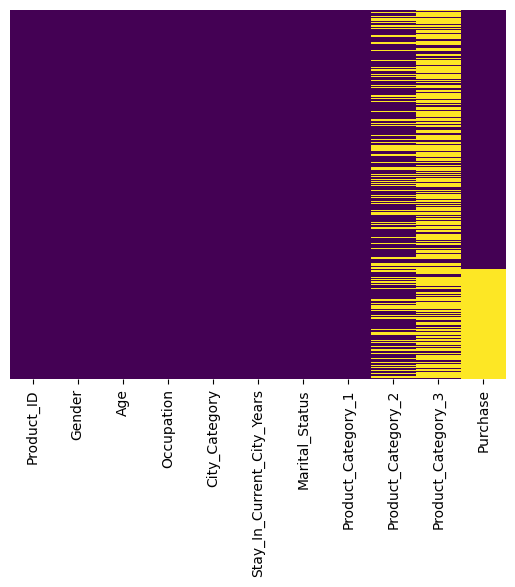

In [30]:
## find out the missing values using visualization
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = "viridis")

In [31]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,3,4+,0,8,NaN,NaN,7969.0


In [32]:
## focus on replacing the missing values
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [33]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [34]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [35]:
df['Product_Category_1'].mode()

0    5
Name: Product_Category_1, dtype: int64

In [36]:
df['Product_Category_1'].mode()[0]

np.int64(5)

In [37]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [38]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [39]:
## product category 3 handling the missing value
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [40]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [41]:
## replace the missing value with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [42]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,3,4+,0,8,8.0,16.0,7969.0


In [44]:
df.shape

(783667, 11)

In [45]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [46]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [47]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,3,4,0,8,8.0,16.0,7969.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 65.8+ MB


In [49]:
## converting the object into intergers
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)

In [50]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,3,4,0,8,8.0,16.0,7969.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 65.8+ MB


## Visualisation

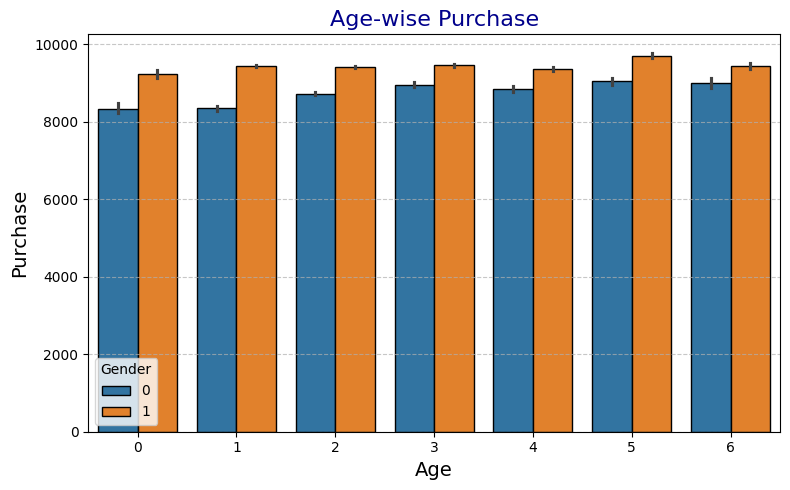

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='Purchase',hue ='Gender', data=df,  edgecolor='black')

# Customizations
plt.title('Age-wise Purchase', fontsize=16, color='darkblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## purchasing of men is high over then women

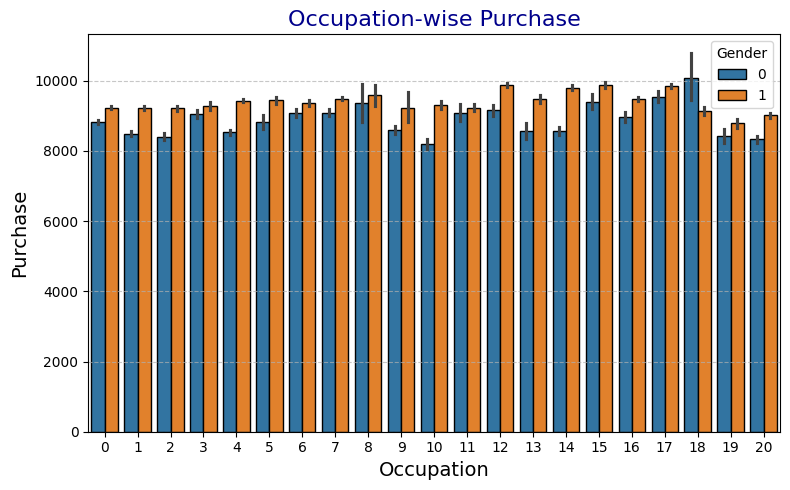

In [53]:
## Visulaization with occupation
plt.figure(figsize=(8, 5))
sns.barplot(x='Occupation', y='Purchase',hue ='Gender', data=df,  edgecolor='black')

# Customizations
plt.title('Occupation-wise Purchase', fontsize=16, color='darkblue')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

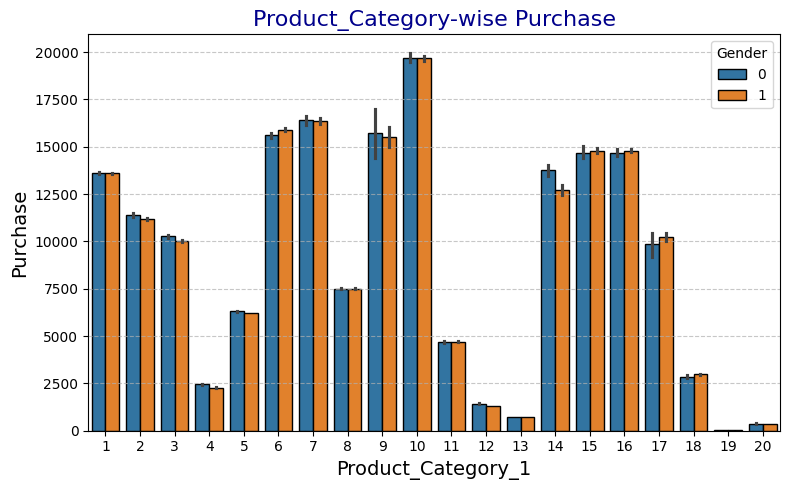

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Product_Category_1', y='Purchase',hue ='Gender', data=df,  edgecolor='black')

# Customizations
plt.title('Product_Category-wise Purchase', fontsize=16, color='darkblue')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

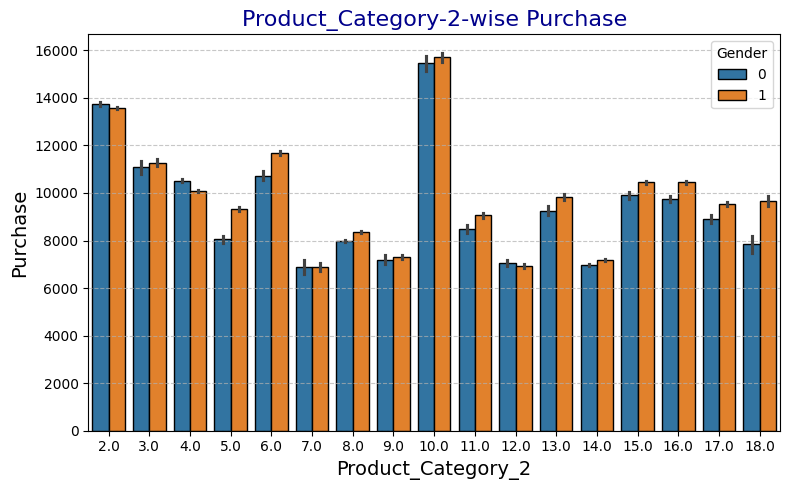

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Product_Category_2', y='Purchase',hue ='Gender', data=df,  edgecolor='black')

# Customizations
plt.title('Product_Category-2-wise Purchase', fontsize=16, color='darkblue')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

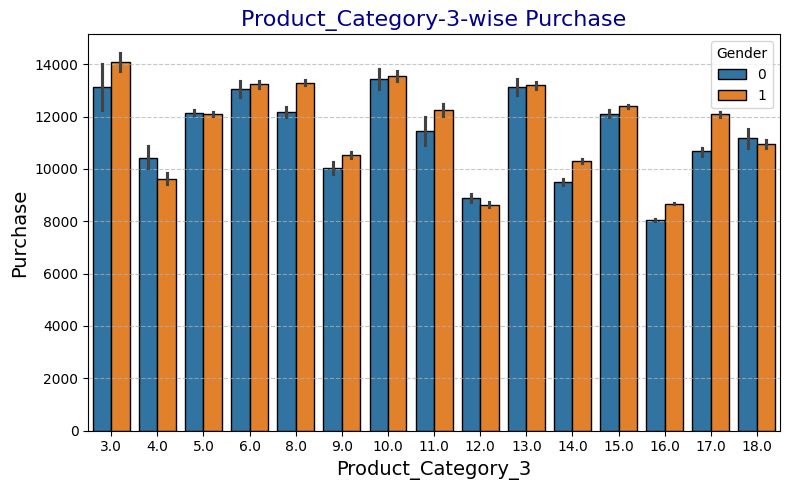

In [56]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Product_Category_3', y='Purchase',hue ='Gender', data=df,  edgecolor='black')

# Customizations
plt.title('Product_Category-3-wise Purchase', fontsize=16, color='darkblue')
plt.xlabel('Product_Category_3', fontsize=14)
plt.ylabel('Purchase', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,3,4,0,8,8.0,16.0,7969.0


In [58]:
## feature scalling
df_test = df[df['Purchase'].isnull()]

In [59]:
df_train = df[~df['Purchase'].isnull()]

In [60]:
X=df_train.drop('Purchase',axis=1)

In [61]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,0,10,1,2,0,3,8.0,16.0
1,P00248942,0,0,10,1,2,0,1,6.0,14.0
2,P00087842,0,0,10,1,2,0,12,8.0,16.0
3,P00085442,0,0,10,1,2,0,12,14.0,16.0
4,P00285442,1,6,16,3,4,0,8,8.0,16.0


In [62]:
Y = df_train['Purchase']

In [63]:
Y.shape

(550068,)

In [64]:
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state =42)

In [66]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [67]:
## feature scalling 
from sklearn.preprocessing import StandardScaler
scaler_object = StandardScaler()
X_train = scaler_object.fit_transform(X_train)
X_test = scaler_object.fit_transform(X_test)

In [70]:
!pip install lightgbm


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)


ModuleNotFoundError: No module named 'lightgbm'

In [73]:
y_pred = model.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'